## General requirements for the assignment
- Make appropriate comments to your code
- Use Markdown cells to provide your answers (when applicable)
- Add your code when there is the comment "YOUR CODE HERE".
- Stick to Pep8 standard as much as possible for your coding
- Submit through GitHub
- Tag the commit as *Final submission of Assignment 1*
- Post (interesting) errors in the course Github's issue page
  
## Assignment Intro
In this assignment, you will be working with data imports. Data is provided to you both to be downloaded locally and accessed remotely. The final deliverable for the assignment is this ipython notebook with the executed cells active and submitted through your personal GitHub accounts. You will be importing data, conduct some basic data exploration and finally exporting the data and saving it for future use.  

You will be working with this data for the other two GO/NOGO assignments as well. The data is from the Google mobility report. You can find more information about this data here: <https://www.google.com/covid19/mobility/data_documentation.html?hl=en>.

### DEADLINE FOR THIS ASSIGNMENT IS 17 SEPTEMBER 2021 BEFORE 23:59

<hr />


## Import libraries
Update this list as you go along with the assignment

In [1]:
import pandas as pd
import os
import xlrd
import numpy as np
import math
# import libraries


# PART I - Data Import and Export

#### 1. Download mobility data from this [link](https://www.google.com/covid19/mobility/), choose *Region CSVs*. From the downloaded data, pick a country to work with. Why did you choose this country?

In [2]:
# path to the downloaded data folder, e.g. 'Downloads/Region_Mobility_Report_CSVs/'
data_dir = 'C:\\Users\\X1\\Desktop\\Region_Mobility_Report_CSVs'
country_code = 'CA'

#### 2. Find the path to the data of your selection. We have prepared some sample code. You need to fill in some parts indicated by 'YOUR CODE HERE'.

In [3]:
all_files = os.listdir(data_dir)
# initilisation
target_file_name = ''
year = '2020'

for file_name in all_files:
    # check if this file is for 2020
    is_year = file_name[0:4]
# if yes, we check if the file name is for the country that you select
    if is_year == year:
        # check if the country_code is in the file_name
        is_country = file_name[5:7]
        if is_country ==country_code:
            # found the file, save it to 'target_file_name'
            target_file_name = '2020_CA_Region_Mobility_Report'
            # we stop looking by breaking out of the for loop
            break
if not target_file_name:
    print('File not found. Check your country code (or select a different one)!')
else:
    print('Found file name is: ' + target_file_name)
    # get the path to the file
    file_path = os.path.abspath(target_file_name)
    print('Path to the file is: ' + file_path)


Found file name is: 2020_CA_Region_Mobility_Report
Path to the file is: C:\Users\X1\2020_CA_Region_Mobility_Report


#### 3. Import the 2020 data for this country as a pandas data frame and name it as `df_2020`. Print the first 10 lines of `df_2020`

In [4]:
df0='C:\\Users\\X1\\Desktop\\Region_Mobility_Report_CSVs\\2020_CA_Region_Mobility_Report.csv'
df1=pd.read_csv(df0, delimiter=',')
df_2020=pd.DataFrame(df1)
print(df_2020.head(10))

  country_region_code country_region sub_region_1 sub_region_2  metro_area  \
0                  CA         Canada          NaN          NaN         NaN   
1                  CA         Canada          NaN          NaN         NaN   
2                  CA         Canada          NaN          NaN         NaN   
3                  CA         Canada          NaN          NaN         NaN   
4                  CA         Canada          NaN          NaN         NaN   
5                  CA         Canada          NaN          NaN         NaN   
6                  CA         Canada          NaN          NaN         NaN   
7                  CA         Canada          NaN          NaN         NaN   
8                  CA         Canada          NaN          NaN         NaN   
9                  CA         Canada          NaN          NaN         NaN   

  iso_3166_2_code  census_fips_code                     place_id        date  \
0             NaN               NaN  ChIJ2WrMN9MDDUsRpY9Doiq3

#### We have also stored the data in a remote server. The data for a particular country can be retrieved with the following API:
`http://mirrors-dev.citg.tudelft.nl:8083/google-mobility-data/{yy}/{CC}` 
#### where yy is either 2020 or 2021, and CC is a 2-letter country code. For example, to get data for 2020 for the Netherlands, the API will be: <http://mirrors-dev.citg.tudelft.nl:8083/google-mobility-data/2020/NL>


#### 4. Download the mobility report data of **2021** for the same country (that you have chosen above) using this API and name it as `df_2021`.  Print the first 10 lines of the dataframe

In [5]:
df2='http://mirrors-dev.citg.tudelft.nl:8083/google-mobility-data/2021/CA'
df3=pd.read_csv(df2, delimiter=',')
df_2021=pd.DataFrame(df3)
print(df_2020.head(10))


  country_region_code country_region sub_region_1 sub_region_2  metro_area  \
0                  CA         Canada          NaN          NaN         NaN   
1                  CA         Canada          NaN          NaN         NaN   
2                  CA         Canada          NaN          NaN         NaN   
3                  CA         Canada          NaN          NaN         NaN   
4                  CA         Canada          NaN          NaN         NaN   
5                  CA         Canada          NaN          NaN         NaN   
6                  CA         Canada          NaN          NaN         NaN   
7                  CA         Canada          NaN          NaN         NaN   
8                  CA         Canada          NaN          NaN         NaN   
9                  CA         Canada          NaN          NaN         NaN   

  iso_3166_2_code  census_fips_code                     place_id        date  \
0             NaN               NaN  ChIJ2WrMN9MDDUsRpY9Doiq3

#### 5. Combine the two dataframes `df_2020` and `df_2021` into a new dataframe `df`. Print the last 10 lines of `df`.

In [6]:
df=df_2020.append(df_2021)
print(df.tail(10))

      country_region_code country_region sub_region_1 sub_region_2  \
63469                  CA         Canada        Yukon          NaN   
63470                  CA         Canada        Yukon          NaN   
63471                  CA         Canada        Yukon          NaN   
63472                  CA         Canada        Yukon          NaN   
63473                  CA         Canada        Yukon          NaN   
63474                  CA         Canada        Yukon          NaN   
63475                  CA         Canada        Yukon          NaN   
63476                  CA         Canada        Yukon          NaN   
63477                  CA         Canada        Yukon          NaN   
63478                  CA         Canada        Yukon          NaN   

       metro_area iso_3166_2_code  census_fips_code  \
63469         NaN           CA-YT               NaN   
63470         NaN           CA-YT               NaN   
63471         NaN           CA-YT               NaN   
63472    

#### 6. `df` now contains mobility data for your selected country from 2020 and 2021. There are three aggregation levels to this data, namely national (`country_region`), provincial (`sub_region_1`), and city (`sub_region_2`). Separate these data into three different dataframes, namely `df_nation`, `df_province`, and `df_city`.  Print the first 5 lines of each of them.  

Hint:
- For the national data, `sub_region_1` and `sub_region_2` are NaN.
- For the provincial data, `sub_region_2` is NaN.
- For the city data, `country_region`, `sub_region_1` and `sub_region_2` are not NaN.
- Logical operators: <https://realpython.com/python-bitwise-operators/>
- Use pandas [isna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html) function 

In [30]:
df_nation = pd.DataFrame(columns=df.columns)
df_province = pd.DataFrame(columns=df.columns)
df_city = pd.DataFrame(columns=df.columns)
df_nation

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline


In [8]:
a=df.isna()
index_provincial=[]
index_national=[]
index_city=[]
for index,row in a.iterrows():
    if row['sub_region_2']==True and row['sub_region_1']==False:
        index_provincial.append(index)
    else:continue
for index,row in a.iterrows():      
    if row['sub_region_2']==True and row['sub_region_1']==True:
        index_national.append(index)
    else:continue
for index,row in a.iterrows():      
    if row['sub_region_2']==False and row['sub_region_1']==False:
        index_city.append(index)
    else:continue

In [32]:
a

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,False,False,True,True,True,True,True,False,False,False,False,False,False,False,False
1,False,False,True,True,True,True,True,False,False,False,False,False,False,False,False
2,False,False,True,True,True,True,True,False,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True,False,False,False,False,False,False,False,False
4,False,False,True,True,True,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63474,False,False,False,True,True,False,True,False,False,False,True,True,True,True,True
63475,False,False,False,True,True,False,True,False,False,False,True,True,True,True,True
63476,False,False,False,True,True,False,True,False,False,False,True,True,True,False,True
63477,False,False,False,True,True,False,True,False,False,False,True,True,True,False,True


In [35]:
for i in index_provincial:
    df_province=df_province.append(df.loc[i])
for i in index_national:
    df_nation=df_nation.append(df.loc[i])  
print(df_province.head(5))
print(df_nation.head(5))

In [17]:
for i in index_city:
    df_city=df_city.append(df.loc[i])   #It could take very long because of the large amount of data
print(df_city.head(5))

KeyboardInterrupt: 

#### 7. Save `df_nation`, `df_province`, and `df_city` into csv files under folder 'processed_data', and locate this folder under `data_dir`. Name the files `{CC}_nation.csv`, `{CC}_province.csv`, and `{CC}_city.csv`, respectively. `{CC}` stands for your selected country code.

In [15]:
# YOUR CODE HERE
df_nation.to_csv(r'C:\Users\X1\Desktop\Region_Mobility_Report_CSVs\processed_data\CA_nation.csv')

In [18]:
df_province.to_csv(r'C:\Users\X1\Desktop\Region_Mobility_Report_CSVs\processed_data\CA_province.csv')

In [ ]:
df_city.to_csv(r'C:\Users\X1\Desktop\Region_Mobility_Report_CSVs\processed_data\CA_city.csv')

<hr />

# PART II - Simple Data Processing

#### 1. There are multiple activities in the mobility report such as workplaces, parks, transit stations, etc. For each of the activities, what are the average percent changes from baselines for your selected country?

In [19]:
ave_retail=df['retail_and_recreation_percent_change_from_baseline'].mean()
ave_grocery=df['grocery_and_pharmacy_percent_change_from_baseline'].mean()
ave_park=df['parks_percent_change_from_baseline'].mean()
ave_transit=df['transit_stations_percent_change_from_baseline'].mean()
ave_workplace=df['workplaces_percent_change_from_baseline'].mean()
ave_residential=df['residential_percent_change_from_baseline'].mean()
ave_workplace

-23.139809518299693

#### 2. Let's look into data from different provinces. How many provinces are there in the data of your selected country? Print all of them.

In [20]:
df['sub_region_1'].value_counts()

Quebec                       46432
Ontario                      28252
British Columbia             14688
Alberta                      10475
Saskatchewan                  9177
New Brunswick                 8067
Manitoba                      7739
Nova Scotia                   7277
Newfoundland and Labrador     4149
Prince Edward Island          2035
Nunavut                        902
Northwest Territories          540
Yukon                          511
Name: sub_region_1, dtype: int64

#### 3. You can get a summary of each of the provinces using pandas describe function. Using this, find which province experienced the largest (average) changes in workplaces.

In [21]:
group=df.groupby(by="sub_region_1")



In [22]:
list(group)

[('Alberta',
       country_region_code country_region sub_region_1  \
  321                   CA         Canada      Alberta   
  322                   CA         Canada      Alberta   
  323                   CA         Canada      Alberta   
  324                   CA         Canada      Alberta   
  325                   CA         Canada      Alberta   
  ...                  ...            ...          ...   
  4869                  CA         Canada      Alberta   
  4870                  CA         Canada      Alberta   
  4871                  CA         Canada      Alberta   
  4872                  CA         Canada      Alberta   
  4873                  CA         Canada      Alberta   
  
                                 sub_region_2  metro_area iso_3166_2_code  \
  321                                     NaN         NaN           CA-AB   
  322                                     NaN         NaN           CA-AB   
  323                                     NaN         NaN

In [23]:
G=group[['workplaces_percent_change_from_baseline']]
G

In [24]:
list(G)

[('Alberta',
       country_region_code country_region sub_region_1  \
  321                   CA         Canada      Alberta   
  322                   CA         Canada      Alberta   
  323                   CA         Canada      Alberta   
  324                   CA         Canada      Alberta   
  325                   CA         Canada      Alberta   
  ...                  ...            ...          ...   
  4869                  CA         Canada      Alberta   
  4870                  CA         Canada      Alberta   
  4871                  CA         Canada      Alberta   
  4872                  CA         Canada      Alberta   
  4873                  CA         Canada      Alberta   
  
                                 sub_region_2  metro_area iso_3166_2_code  \
  321                                     NaN         NaN           CA-AB   
  322                                     NaN         NaN           CA-AB   
  323                                     NaN         NaN

In [25]:
G.describe()

workplaces_percent_change_from_baseline             \
                                                            count       mean   
sub_region_1                                                                   
Alberta                                                   10198.0 -23.989410   
British Columbia                                          14496.0 -22.178049   
Manitoba                                                   7657.0 -22.046885   
New Brunswick                                              7948.0 -23.800453   
Newfoundland and Labrador                                  4116.0 -12.682945   
Northwest Territories                                       534.0 -19.226592   
Nova Scotia                                                7132.0 -21.014302   
Nunavut                                                     896.0 -15.162946   
Ontario                                                   27938.0 -26.456511   
Prince Edward Island                                       2002.0 -17.499001   
Quebec                                                    45311.0 -23.817086   
Saskatchewan                                               9048.0 -18.865606   
Yukon                                                       440.0 -17.950000   

                                                                    
                                 std   min   25%   50%   75%   max  
sub_region_1                                                        
Alberta                    14.162677 -88.0 -31.0 -23.0 -16.0  17.0  
British Columbia           14.954237 -87.0 -30.0 -20.0 -13.0  20.0  
Manitoba                   15.459457 -90.0 -30.0 -21.0 -12.0  33.0  
New Brunswick              16.737627 -88.0 -33.0 -22.0 -13.0  30.0  
Newfoundland and Labrador  19.593024 -79.0 -23.0  -9.0   1.0  44.0  
Northwest Territories      15.122860 -76.0 -29.0 -15.0  -8.0   7.0  
Nova Scotia                18.713820 -86.0 -32.0 -19.0  -8.0  36.0  
Nunavut                    15.690449 -69.0 -24.0 -13.0  -3.0  11.0  
Ontario                    18.772390 -89.0 -38.0 -26.0 -14.0  45.0  
Prince Edward Island       18.350882 -85.0 -28.0 -14.0  -5.0  23.0  
Quebec                     18.189739 -92.0 -35.0 -21.0 -11.0  29.0  
Saskatchewan               14.808443 -86.0 -26.0 -16.0  -9.0  15.0  
Yukon                      15.864955 -83.0 -27.0 -13.0  -9.0   5.0

#### 4. Create a new dataframe that only contains data from the province with the largest changes in workplaces, which you found in the previous question.

In [26]:
# Ontario
Ontario=df[(df['sub_region_1']=='Ontario')]
Ontario

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
29748,CA,Canada,Ontario,NaN,NaN,CA-ON,NaN,ChIJrxNRX7IFzkwRCR5iKVZC-HA,2020-02-15,2.0,3.0,20.0,5.0,1.0,-1.0
29749,CA,Canada,Ontario,NaN,NaN,CA-ON,NaN,ChIJrxNRX7IFzkwRCR5iKVZC-HA,2020-02-16,16.0,13.0,44.0,5.0,-2.0,-2.0
29750,CA,Canada,Ontario,NaN,NaN,CA-ON,NaN,ChIJrxNRX7IFzkwRCR5iKVZC-HA,2020-02-17,-26.0,-37.0,70.0,-40.0,-72.0,16.0
29751,CA,Canada,Ontario,NaN,NaN,CA-ON,NaN,ChIJrxNRX7IFzkwRCR5iKVZC-HA,2020-02-18,-1.0,12.0,-5.0,2.0,0.0,1.0
29752,CA,Canada,Ontario,NaN,NaN,CA-ON,NaN,ChIJrxNRX7IFzkwRCR5iKVZC-HA,2020-02-19,0.0,4.0,-4.0,-2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37057,CA,Canada,Ontario,Wellington County,NaN,NaN,NaN,ChIJuTjl8B_BK4gRI_6Rd2EM7lk,2021-08-28,-8.0,7.0,248.0,22.0,-12.0,-1.0
37058,CA,Canada,Ontario,Wellington County,NaN,NaN,NaN,ChIJuTjl8B_BK4gRI_6Rd2EM7lk,2021-08-29,-4.0,2.0,205.0,-5.0,-14.0,-2.0
37059,CA,Canada,Ontario,Wellington County,NaN,NaN,NaN,ChIJuTjl8B_BK4gRI_6Rd2EM7lk,2021-08-30,-5.0,10.0,144.0,-21.0,-42.0,8.0
37060,CA,Canada,Ontario,Wellington County,NaN,NaN,NaN,ChIJuTjl8B_BK4gRI_6Rd2EM7lk,2021-08-31,-5.0,15.0,138.0,-22.0,-40.0,7.0


# 5. We're going to look at the changes of this province over time. As you can see, the column date is in string format. Convert this str date column data str to datetime format and append as an extra column called 'date2' to the dataframe.  
Hint: <https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html>

In [27]:
time=pd.to_datetime(Ontario['date'])
Ontario['date2']=time

<ipython-input-27-8c44571fc256>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ontario['date2']=time


In [28]:
Ontario

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,date2
29748,CA,Canada,Ontario,NaN,NaN,CA-ON,NaN,ChIJrxNRX7IFzkwRCR5iKVZC-HA,2020-02-15,2.0,3.0,20.0,5.0,1.0,-1.0,2020-02-15
29749,CA,Canada,Ontario,NaN,NaN,CA-ON,NaN,ChIJrxNRX7IFzkwRCR5iKVZC-HA,2020-02-16,16.0,13.0,44.0,5.0,-2.0,-2.0,2020-02-16
29750,CA,Canada,Ontario,NaN,NaN,CA-ON,NaN,ChIJrxNRX7IFzkwRCR5iKVZC-HA,2020-02-17,-26.0,-37.0,70.0,-40.0,-72.0,16.0,2020-02-17
29751,CA,Canada,Ontario,NaN,NaN,CA-ON,NaN,ChIJrxNRX7IFzkwRCR5iKVZC-HA,2020-02-18,-1.0,12.0,-5.0,2.0,0.0,1.0,2020-02-18
29752,CA,Canada,Ontario,NaN,NaN,CA-ON,NaN,ChIJrxNRX7IFzkwRCR5iKVZC-HA,2020-02-19,0.0,4.0,-4.0,-2.0,1.0,0.0,2020-02-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37057,CA,Canada,Ontario,Wellington County,NaN,NaN,NaN,ChIJuTjl8B_BK4gRI_6Rd2EM7lk,2021-08-28,-8.0,7.0,248.0,22.0,-12.0,-1.0,2021-08-28
37058,CA,Canada,Ontario,Wellington County,NaN,NaN,NaN,ChIJuTjl8B_BK4gRI_6Rd2EM7lk,2021-08-29,-4.0,2.0,205.0,-5.0,-14.0,-2.0,2021-08-29
37059,CA,Canada,Ontario,Wellington County,NaN,NaN,NaN,ChIJuTjl8B_BK4gRI_6Rd2EM7lk,2021-08-30,-5.0,10.0,144.0,-21.0,-42.0,8.0,2021-08-30
37060,CA,Canada,Ontario,Wellington County,NaN,NaN,NaN,ChIJuTjl8B_BK4gRI_6Rd2EM7lk,2021-08-31,-5.0,15.0,138.0,-22.0,-40.0,7.0,2021-08-31


#### 6. Sort the data in ascending order of time and save it as 'df_province_largest'

In [29]:
df_province_largest=Ontario.sort_values('date2')
df_province_largest


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,date2
29748,CA,Canada,Ontario,NaN,NaN,CA-ON,NaN,ChIJrxNRX7IFzkwRCR5iKVZC-HA,2020-02-15,2.0,3.0,20.0,5.0,1.0,-1.0,2020-02-15
33250,CA,Canada,Ontario,Greater Sudbury,NaN,NaN,NaN,ChIJQXcuAlWAOU0RaQt3JcX2ZW4,2020-02-15,-7.0,-2.0,-18.0,3.0,-1.0,0.0,2020-02-15
39012,CA,Canada,Ontario,Ottawa,NaN,NaN,NaN,ChIJmcB2guBn0UwRr0RW_iic0LY,2020-02-15,13.0,6.0,68.0,3.0,1.0,-2.0,2020-02-15
31660,CA,Canada,Ontario,Cochrane District,NaN,NaN,NaN,ChIJT533myXybk0RA_d5CcdLbIY,2020-02-15,5.0,3.0,NaN,-2.0,0.0,NaN,2020-02-15
36958,CA,Canada,Ontario,Lennox and Addington County,NaN,NaN,NaN,ChIJr66-_OGI00wRUYspik9Ps28,2020-02-15,NaN,13.0,NaN,58.0,4.0,NaN,2020-02-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29960,CA,Canada,Ontario,Lanark County,NaN,NaN,NaN,ChIJA6-CHY120kwRlFrPgbWU6Ik,2021-09-01,39.0,30.0,NaN,NaN,-29.0,5.0,2021-09-01
29716,CA,Canada,Ontario,Lambton County,NaN,NaN,NaN,ChIJY0D2UwR6L4gRXn7BpePeLnM,2021-09-01,17.0,14.0,NaN,-47.0,-19.0,3.0,2021-09-01
29472,CA,Canada,Ontario,Kenora District,NaN,NaN,NaN,ChIJJ30D6SyXglIRuginOHwcinE,2021-09-01,61.0,41.0,NaN,NaN,-14.0,0.0,2021-09-01
30204,CA,Canada,Ontario,Leeds and Grenville United Counties,NaN,NaN,NaN,ChIJt6wEDmEn1okRYEnD7jwoRHY,2021-09-01,28.0,39.0,NaN,96.0,-22.0,4.0,2021-09-01


<AxesSubplot:xlabel='date2'>

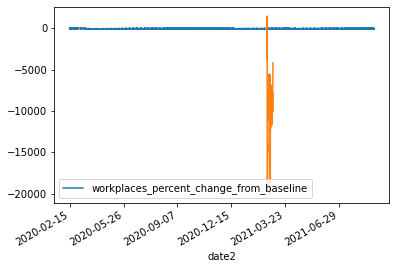

In [68]:
# Execute the cell with the following command to visualize the results
df_province_largest.plot('date', 'workplaces_percent_change_from_baseline')

df_province_largest.resample('7D', on='date2').sum()['workplaces_percent_change_from_baseline'].plot()

#### 7. Compare the results above with the results in the google mobility report pdf of your selected province. Discuss the differences and similarities. Please save the mobility report pdf that you use to compare the results with! An example mobility report pdf can be found [here](https://www.gstatic.com/covid19/mobility/2021-09-01_AW_Mobility_Report_en.pdf)

The graph here shows a flat line fluctuating at a certain value 0, the mobility report indicates that workplaces of Ontario has a regular pattern that it decrease to around -40% and continue for a while, then go back to 0.